# Result = 31%

# Default Setup

In [0]:
# Dataloading Stuff
from google.colab import drive
from sys import path
import os

# Standard Stuff
!pip3 install numpy sklearn iterative-stratification pandas pyss3
from sklearn.model_selection import train_test_split

from pyss3 import SS3
from pyss3.util import Dataset, Evaluation, span

import numpy as np
import pandas as pd

drive.mount('/content/drive', force_remount=True)
path_root = '/content/drive/My Drive/NLP Lab/SingleLabel/'
path.append(path_root)
data_root = 'data/'

/usr/lib/python3.6/threading.py:868: ResourceWarning: unclosed file <_io.FileIO name=55 mode='wb' closefd=True>
  del self._target, self._args, self._kwargs
/usr/lib/python3.6/threading.py:868: ResourceWarning: unclosed file <_io.FileIO name=56 mode='rb' closefd=True>
  del self._target, self._args, self._kwargs


Mounted at /content/drive


## Load Data

In [0]:
import json
files = []
text = []
labels = []
failed_counter = 0

for _, _, file_names in os.walk(path_root + data_root + "AmazonReview2018"):
  for file_name in file_names:
    if '.json' in file_name:
      files.append(file_name)

for j_file in files[:5]:
  with open(path_root + data_root + "AmazonReview2018/" + j_file, "r") as json_file:
    for line in json_file:
      json_data = json.loads(line)
      try:
        text.append(json_data['reviewText'])
        labels.append(str(json_data['overall']))
      except KeyError:
        failed_counter += 1

print(len(text), failed_counter)
X_train, X_val, y_train, y_val = train_test_split(text, labels, test_size=0.2)

1632569 1075


## Work with Classifier

Training on '1.0':   0%|          | 0/5 [00:00<?, ?it/s]

 [ about to start training ]


Training on '5.0': 100%|██████████| 5/5 [05:04<00:00, 60.93s/it]


 [ finished --time: 309.7s ]
 [ about to start updating values... ]
 [ caching lv values ]
    [ lv values for 0 (1.0) ]
    [ lv values for 1 (2.0) ]
    [ lv values for 2 (3.0) ]
    [ lv values for 3 (4.0) ]
    [ lv values for 4 (5.0) ]
 [ caching sg values ]
    [ sg values for 0 (1.0) ]
    [ sg values for 1 (2.0) ]
    [ sg values for 2 (3.0) ]
    [ sg values for 3 (4.0) ]
    [ sg values for 4 (5.0) ]
[ caching gv values ]
    [ gv values for 0 (1.0) ]
    [ gv values for 1 (2.0) ]
    [ gv values for 2 (3.0) ]
    [ gv values for 3 (4.0) ]
    [ gv values for 4 (5.0) ]
 [ updating max gv values ]
    [ max gv values for 0 (1.0) ]
    [ max gv values for 1 (2.0) ]
    [ max gv values for 2 (3.0) ]
    [ max gv values for 3 (4.0) ]
    [ max gv values for 4 (5.0) ]
 [ max gv values have been updated ]
 [ caching confidence values (cvs) ]
    [ cvs for 0 (1.0) ]
    [ cvs for 1 (2.0) ]
    [ cvs for 2 (3.0) ]
    [ cvs for 3 (4.0) ]
    [ cvs for 4 (5.0) ]
 [ finished --time: 6.

Classification: 100%|██████████| 326514/326514 [00:06<00:00, 48432.71it/s]



              precision    recall  f1-score   support

         1.0       0.23      0.62      0.34     19333
         2.0       0.13      0.14      0.14     13771
         3.0       0.38      0.10      0.16     25594
         4.0       0.35      0.06      0.10     49384
         5.0       0.77      0.86      0.81    218432

    accuracy                           0.64    326514
   macro avg       0.37      0.36      0.31    326514
weighted avg       0.62      0.64      0.60    326514


 Accuracy: 0.637

[ updating evaluations cache ]


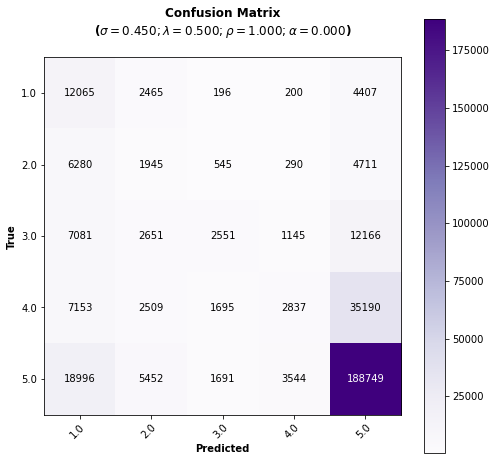

0.30930498249643323

In [0]:
clf = SS3()
clf.fit(X_train, y_train)
Evaluation.test(clf, X_val, y_val, metric="f1-score")

# Make Binary Classification



Training:   0%|          | 0/2 [00:00<?, ?it/s]

Training on 'negative':   0%|          | 0/2 [00:00<?, ?it/s]

Training on 'negative':  50%|█████     | 1/2 [01:10<01:10, 70.32s/it]

Training on 'positive':  50%|█████     | 1/2 [01:10<01:10, 70.32s/it]

Training on 'positive': 100%|██████████| 2/2 [05:06<00:00, 153.48s/it]



              precision    recall  f1-score   support

         1.0       0.23      0.62      0.34     19333
         2.0       0.13      0.14      0.14     13771
         3.0       0.38      0.10      0.16     25594
         4.0       0.35      0.06      0.10     49384
         5.0       0.77      0.86      0.81    218432

    accuracy                           0.64    326514
   macro avg       0.37      0.36      0.31    326514
weighted avg       0.62      0.64      0.60    326514


 Accuracy: 0.637



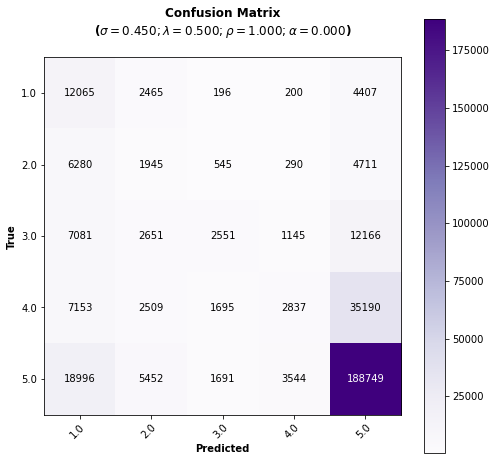

0.30930498249643323

In [0]:
df = pd.Series(labels).astype(str)
df.replace({'1.0': 'negative', '2.0': 'negative', '3.0': 'negative', '4.0': 'positive', '5.0': 'positive'}, inplace=True, regex=True)
new_labels = df.to_list()
X_train2, X_val2, y_train2, y_val2 = train_test_split(text, new_labels, test_size=0.2)

clf = SS3()
clf.fit(X_train2, y_train2)
Evaluation.test(clf, X_val2, y_val2, metric="f1-score")



Caching documents:   0%|          | 0/326514 [00:00<?, ?it/s]

Caching documents:   0%|          | 476/326514 [00:00<01:08, 4746.38it/s]

Caching documents:   0%|          | 1045/326514 [00:00<01:05, 4992.94it/s]

Caching documents:   0%|          | 1543/326514 [00:00<01:05, 4987.97it/s]

Caching documents:   1%|          | 2109/326514 [00:00<01:02, 5171.28it/s]

Caching documents:   1%|          | 2707/326514 [00:00<01:00, 5389.26it/s]

Caching documents:   1%|          | 3171/326514 [00:00<01:03, 5130.35it/s]

Caching documents:   1%|          | 3761/326514 [00:00<01:00, 5336.62it/s]

Caching documents:   1%|▏         | 4382/326514 [00:00<00:57, 5567.57it/s]

Caching documents:   2%|▏         | 4930/326514 [00:00<00:58, 5539.84it/s]

Caching documents:   2%|▏         | 5487/326514 [00:01<00:57, 5544.03it/s]

Caching documents:   2%|▏         | 6035/326514 [00:01<00:58, 5524.64it/s]

Caching documents:   2%|▏         | 6631/326514 [00:01<00:56, 5647.79it/s]

Caching documents:   2%|


              precision    recall  f1-score   support

    negative       0.64      0.60      0.62     58662
    positive       0.91      0.92      0.92    267852

    accuracy                           0.87    326514
   macro avg       0.77      0.76      0.77    326514
weighted avg       0.86      0.87      0.86    326514


 Accuracy: 0.866

[ updating evaluations cache ]


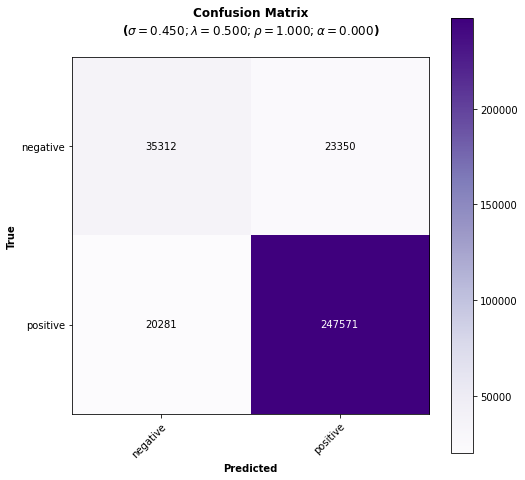

0.7685719818944302

In [0]:
Evaluation.clear_cache()
Evaluation.test(clf, X_val2, y_val2, metric="f1-score")